In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

In [2]:
d1=pd.read_excel('Data_Train.xlsx')

In [3]:
d2=pd.read_excel('Test_set.xlsx')
d3=pd.read_excel('Sample_submission.xlsx')

In [4]:
d1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
d2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
d3.head()

,Price
0,15998
1,16612
2,25572
3,25778
4,16934


In [7]:
test=pd.concat([d2,d3],axis=1)

In [8]:
data=pd.concat([d1,test])

In [9]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,14046
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,14086
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,22720
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,23544


# Performing Simple EDA 

In [10]:
data.shape

(13354, 11)

In [11]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13354 non-null  object
 1   Date_of_Journey  13354 non-null  object
 2   Source           13354 non-null  object
 3   Destination      13354 non-null  object
 4   Route            13353 non-null  object
 5   Dep_Time         13354 non-null  object
 6   Arrival_Time     13354 non-null  object
 7   Duration         13354 non-null  object
 8   Total_Stops      13353 non-null  object
 9   Additional_Info  13354 non-null  object
 10  Price            13354 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.2+ MB


**Route and Total Stops Columns has 1 null values so we can drop null values** 

In [13]:
data=data.dropna()

In [14]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13353 non-null  object
 1   Date_of_Journey  13353 non-null  object
 2   Source           13353 non-null  object
 3   Destination      13353 non-null  object
 4   Route            13353 non-null  object
 5   Dep_Time         13353 non-null  object
 6   Arrival_Time     13353 non-null  object
 7   Duration         13353 non-null  object
 8   Total_Stops      13353 non-null  object
 9   Additional_Info  13353 non-null  object
 10  Price            13353 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.2+ MB


**Null values are dropped** 

In [16]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Cleaning of data 

In [17]:
data['Journey_Day']= pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.day

<ipython-input-17-6f78991fe20a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Journey_Day']= pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.day


In [18]:
data['Journey_Month']= pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.month

<ipython-input-18-ff6dbbfd60cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Journey_Month']= pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.month


In [19]:
data.drop('Date_of_Journey',axis=1,inplace=True)

C:\Users\Pragyansh\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,14046,6,6
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,14086,27,3
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,22720,6,3
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,23544,6,3


In [21]:
data.reset_index(inplace=True)

In [22]:
duration=list(data['Duration'])

dur_hou= [str(i.split('h')[0]) for i in duration]

data['Duration_hours'] = dur_hou

<ipython-input-22-089291494941>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Duration_hours'] = dur_hou


In [23]:
duration=list(data['Duration'])


dur_min= [str(i.split('h')[-1]) for i in duration]

dur_m= [str(i.split('m')[0]) for i in dur_min]
dur_m
data['Duration_Minutes'] = dur_m

<ipython-input-23-5bc101561687>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Duration_Minutes'] = dur_m


In [24]:
data.drop('Duration',axis=1, inplace=True)

C:\Users\Pragyansh\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
data['Duration_Minutes'].replace('',0, inplace=True)

C:\Users\Pragyansh\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [26]:
data.head(3)

,index,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_Minutes
0,0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2,50
1,1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,5,7,25
2,2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,6,19,0


In [27]:
data['Depart_Time_Hour']=pd.to_datetime(data.Dep_Time).dt.hour
data['Depart_Time_Minute']=pd.to_datetime(data.Dep_Time).dt.minute

data.drop('Dep_Time',axis=1,inplace=True)
data.head()

<ipython-input-27-0a38e7dc41e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Depart_Time_Hour']=pd.to_datetime(data.Dep_Time).dt.hour
<ipython-input-27-0a38e7dc41e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Depart_Time_Minute']=pd.to_datetime(data.Dep_Time).dt.minute
C:\Users\Pragyansh\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

,index,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_Minutes,Depart_Time_Hour,Depart_Time_Minute
0,0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,24,3,2,50,22,20
1,1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,1,5,7,25,5,50
2,2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882,9,6,19,0,9,25
3,3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,6218,12,5,5,25,18,5
4,4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,13302,1,3,4,45,16,50


In [28]:
data['Arrival_Time_Hour']=pd.to_datetime(data.Arrival_Time).dt.hour
data['Arrival_Time_Minute']=pd.to_datetime(data.Arrival_Time).dt.minute

data.drop('Arrival_Time',axis=1,inplace=True)
data.head()

<ipython-input-28-32f9bde7494f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Arrival_Time_Hour']=pd.to_datetime(data.Arrival_Time).dt.hour
<ipython-input-28-32f9bde7494f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Arrival_Time_Minute']=pd.to_datetime(data.Arrival_Time).dt.minute
C:\Users\Pragyansh\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

,index,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_Minutes,Depart_Time_Hour,Depart_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2,50,22,20,1,10
1,1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,7,25,5,50,13,15
2,2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,19,0,9,25,4,25
3,3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,5,25,18,5,23,30
4,4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,4,45,16,50,21,35


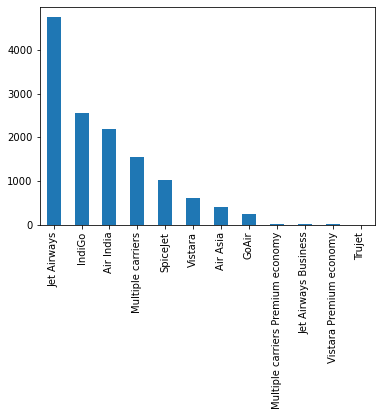

In [29]:
data.Airline.value_counts().plot(kind='bar')
plt.show()

**Jet Airways has the maximum no. of flights and TruJet has the lowest no. of flights.** 

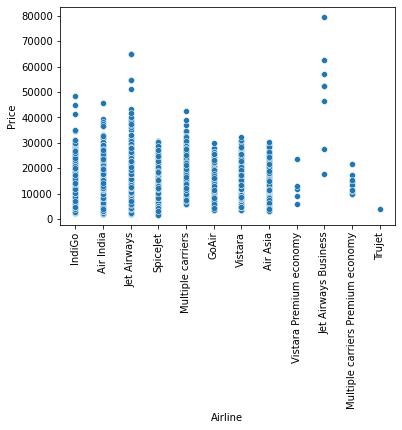

In [30]:
sns.scatterplot(x=data.Airline,y=data.Price)
plt.xticks(rotation=90)
plt.show()

**Jet Airways has the highest ticket price which is of 80000 and Spicejet has the lowest ticket price <10000** 

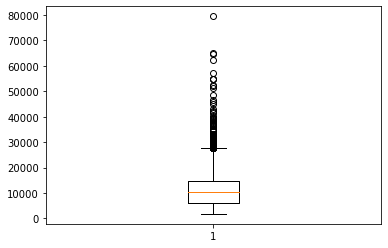

In [31]:
plt.boxplot(data.Price)
plt.show()

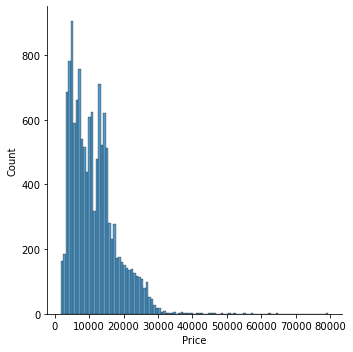

In [32]:
sns.displot(data.Price)
plt.show()

**Maximum ticket prices are from range Rs.2000 to 16000** 

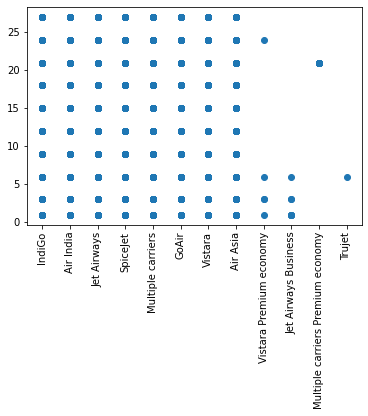

In [33]:
plt.scatter(data.Airline,data.Journey_Day)
plt.xticks(rotation=90)
plt.show()

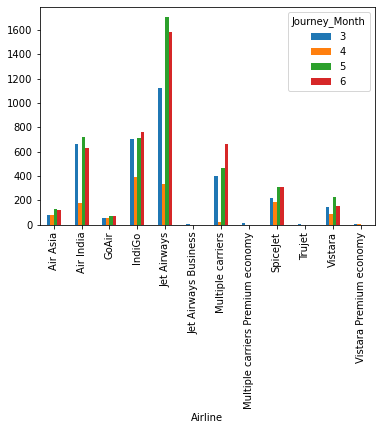

In [34]:
pd.crosstab(data.Airline,data.Journey_Month).plot(kind='bar')
plt.show()

In [35]:
data.Journey_Month.value_counts()

5    4328
6    4286
3    3412
4    1327
Name: Journey_Month, dtype: int64

**There are total 4 Months in the data in which airline are working**

**In Month 5(May) there are highest number of flights are operated and in month 4(April) there are less flights operated**

In [36]:
data.Journey_Day.value_counts()

9     1769
6     1626
21    1368
27    1350
1     1349
24    1307
15    1251
12    1214
3     1083
18    1036
Name: Journey_Day, dtype: int64

**According to data on 10 days the Airlines are operating their oprations**

**On date 9 there are highest number of flights available**

**On date 18 there are very less number of flights available**

In [37]:
pd.crosstab(index=data.Journey_Day,columns=data.Journey_Month,values=data.Airline,aggfunc='count')

Journey_Month,3,4,5,6
Journey_Day,,,,
1,245,335,339,430
3,403,138,117,425
6,528,114,354,630
9,378,149,628,614
12,185,74,327,628
15,195,112,511,433
18,197,79,633,127
21,516,104,615,133
24,401,113,357,436


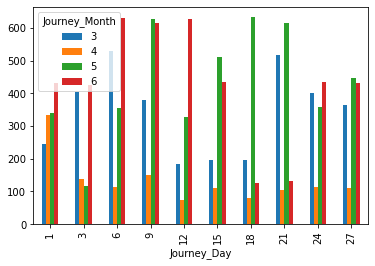

In [38]:
pd.crosstab(index=data.Journey_Day,columns=data.Journey_Month,values=data.Airline,aggfunc='count').plot(kind='bar')
plt.show()

**Top dates of each month which has highest flights operation are as follows:
6th March
1st April
18th May
12th June**

In [39]:
data.Duration_hours.value_counts()

2     2967
1      785
3      627
5      608
7      600
9      551
12     538
8      531
13     516
11     467
10     459
6      442
14     424
15     339
23     330
26     292
16     286
4      278
22     273
24     240
21     237
25     231
27     222
20     203
18     179
19     168
17     161
28     116
29      76
30      61
38      41
37      22
33      21
32      12
36      11
35      10
34       9
31       8
39       3
5m       2
42       2
47       2
40       2
41       1
Name: Duration_hours, dtype: int64

**Maximum flight are of 2 hours and only 1 flight is of 41 hours** 

In [40]:
data.head(2)

,index,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_Minutes,Depart_Time_Hour,Depart_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2,50,22,20,1,10
1,1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,7,25,5,50,13,15


In [41]:
data.Source.value_counts()

Delhi       5681
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

**Maximum flights are starting from Delhi** 

In [42]:
data.Destination.value_counts()

Cochin       5681
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

**Maximum flights are going to Cochin**

In [43]:
pd.crosstab(columns=data.Journey_Month,index=data.Depart_Time_Hour,values=data.Airline,aggfunc='count')

Journey_Month,3,4,5,6
Depart_Time_Hour,,,,
0,21.0,10.0,10.0,10.0
1,11.0,10.0,10.0,13.0
2,64.0,23.0,62.0,79.0
3,3.0,NaN,9.0,18.0
4,72.0,32.0,52.0,63.0
5,278.0,59.0,198.0,241.0
6,239.0,110.0,264.0,250.0
7,292.0,106.0,327.0,342.0
8,305.0,61.0,264.0,242.0


**In March maximum flights are departing between 8 and 9 AM**

**In April maximum flights are departing between 6 and 7 AM**

**In May maximum flights are departing between 9 and 10 AM**

**In June maximum flights are departing between 9 and 10 AM**

In [44]:
pd.crosstab(columns=data.Journey_Month,index=data.Arrival_Time_Hour,values=data.Airline,aggfunc='count')

Journey_Month,3,4,5,6
Arrival_Time_Hour,,,,
0,112,78,116,105
1,161,41,218,268
2,20,21,28,23
3,10,12,18,21
4,255,33,309,416
5,34,5,35,21
6,13,11,18,22
7,140,49,159,170
8,161,91,206,136


**In March maximum flights are Arriving between 7 and 8 PM**

**In April maximum flights are Arriving between 7 and 8 PM**

**In May maximum flights are Arriving between 7 and 8 PM**

**In June maximum flights are Arriving between 7 and 8 PM** 

## So the inference is that MAXIMUM Flights are arring at the Airport Between 7 to 8 PM

In [45]:
data.Route.value_counts()

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → IXC → DEL → HYD             1
BOM → UDR → DEL → HYD             1
CCU → VTZ → BLR                   1
BLR → HBX → BOM → NAG → DEL       1
BLR → HBX → BOM → AMD → DEL       1
Name: Route, Length: 132, dtype: int64

**3000 flights which is highest among all, are going from Delhi to Cochin with a hault at Mumbai** 

In [46]:
data.head(2)

,index,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_Minutes,Depart_Time_Hour,Depart_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2,50,22,20,1,10
1,1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,7,25,5,50,13,15


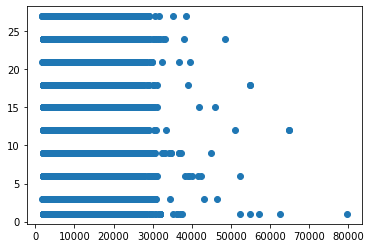

<Figure size 720x576 with 0 Axes>

In [47]:
plt.scatter(data.Price,data.Journey_Day)
plt.figure(figsize=[10,8])
plt.show()

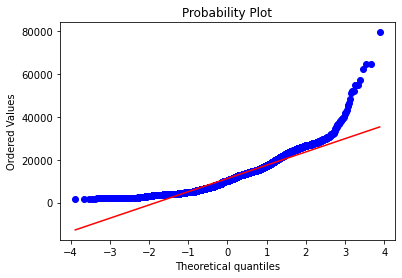

In [48]:
probplot(data.Price,plot=plt)
plt.show()

C:\Users\Pragyansh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

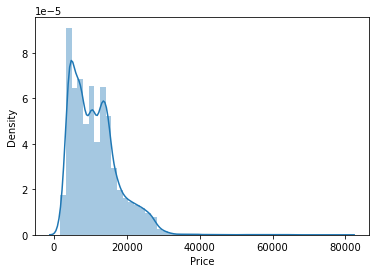

In [49]:
sns.distplot(data.Price)

**Positive skewed graph** 

In [53]:
data[['Price','Journey_Day']].corr()

,Price,Journey_Day
Price,1.000000,-0.110645
Journey_Day,-0.110645,1.000000
